# Mejorando la Precisión a través de convoluciones

En el anterior notebook hemos visto cómo implementar una red neuronal profunda con 3 capas, una capa de entrada, una capa oculta y la capa de salida. También hemos experimentado usando distinto número de unidades y capas ocultas para observar su efecto en la precisión del modelo entrenado.

Para una referencia conveniente, a continuación tenemos el código completo para tener un valor inicial de precisión:

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images / 255.0
test_images=test_images / 255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)

test_loss = model.evaluate(test_images, test_labels)

2021-10-15 20:55:01.836379: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-15 20:55:01.836401: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-10-15 20:55:03.105032: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-15 20:55:03.105554: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-15 20:55:03.105616: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.s

Epoch 1/5
1875/1875 [==============================] - 2s 768us/step - loss: 0.4950 - accuracy: 0.8281
Epoch 2/5
1875/1875 [==============================] - 1s 759us/step - loss: 0.3723 - accuracy: 0.8651
Epoch 3/5
1875/1875 [==============================] - 1s 737us/step - loss: 0.3352 - accuracy: 0.8775
Epoch 4/5
1875/1875 [==============================] - 1s 732us/step - loss: 0.3117 - accuracy: 0.8855
Epoch 5/5
313/313 [==============================] - 0s 490us/step - loss: 0.3644 - accuracy: 0.8681


La precisión alcanzada será aproximadamanete 89% en entrenamiento y 87% en validación, nada mal; pero, cómo podemos mejorar este rendimiento?

Una forma es usar algo llamado Convolución. Una Convolución es una operación matemática que puede ser aplicada a señales de distinta naturaleza, en este caso, la señal a aplicar será nuestra imagen y sus correspondientes mapas de características en las capas ocultas.

Pero antes de poder aplicar esta operación, debemos definir de mejor manera qué es y cómo se usa una convolución en imágenes.


## Convoluciones
En escencia, tendremos un arreglo llamado **parche** o **kernel** (usualmente de 3x3 o 5x5) y lo *deslizaremos* sobre la imagen en la que queremos operar. Se puede observar una visualización de la misma operación en la siguiente figura:

![tensor](img/conv1.gif)

en el caso anterior, un parche de 3x3 se desliza sobre una imagen original de tamaño 5x5 obteniendo como resultado una **nueva imagen** de tamaño 5x5, nótese que para que podamos tener una imagen del mismo tamaño original necesitamos agregar valores *extra* en los extremos de la imagen de entrada, esta técnica se denomina *padding*. 


## Kernels de convolución

En el contexto de las redes neuronales, intercambiaremos en nuestra arquitectura la estructura tradicional de las **neuronas** o unidades en las capas de la red por **filtros**. En la siguiente figura se puede visualizar el efecto de estos filtros.

![tensor](img/conv3.gif)

Por tanto, durante el entrenamiento, la tarea es encontrar los valores más adecuados de cada elemento de los filtros para minimizar la función de costo o pérdida.

La naturaleza y características de la operación de convolución son ideales para ser implementadas en tareas de visión artificial pues permiten a la red, a través de los filtros entrenados, *resaltar* las características más importantes para la predicción y mejora la eficiencia computacional pues nos enfocamos solamente en entrenar sobre ésas mismas características resaltadas.


## Fashion MNIST con una red convolucional

Una vez entendido el concepto e importancia de la operación de convolución podemos aplicarlo a nuestra tarea de clasificación de prendas de vestir.

Keras nos ofrece, mediante su modelo secuencial, definir una capa especial llamada **Conv2D** que implementa todas las operaciones.

La implementación mejorada se vería así:


In [7]:
import tensorflow as tf
import keras
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

mnist = keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

# definición del modelo
model = keras.models.Sequential([
  Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  MaxPooling2D(2, 2),
  Conv2D(64, (3,3), activation='relu'),
  MaxPooling2D(2,2),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [8]:
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.4528 - accuracy: 0.8358
Epoch 2/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3052 - accuracy: 0.8884
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2576 - accuracy: 0.9053
Epoch 4/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2243 - accuracy: 0.9168
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.2650 - accuracy: 0.9044


Analice la diferencia en la precisión obtenida con nuestra nueva red convolucional.



## Ejercicios de exploración

Incremente el número de épocas en el entrenamiento y analice cuidadosamente el efecto en la precisión final tanto en el conjunto de entrenamiento como en el conjunto de validación.


## Visualizando las capas convolucionales

Visualizaremos los efectos de la convolución y los **mapas de características** de las capas ocultas de manera visual. 

De los 100 primeros ejemplos en el conjunto de pruebas, aquellos entre el índice 23 y 28 son zapatos. Analice la similaridad entre sus mapas de características.


In [6]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


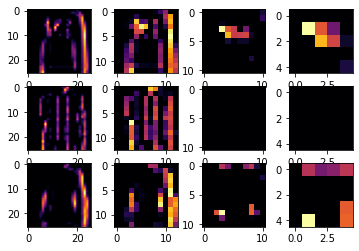

In [20]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=1
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 45
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

## Ejercicios
1. Modifique la cantidad de filtros de convolución, cambie de 32 a 16 o 64, cuál es el impacto en la precisión y/o el tiempo de entrenamiento?
2. Elimine la última capa de convolución, cuál es el impacto?
3. Y qué pasa si se agregan nuevas capas de convolución?
